### Create a Search Index and insert documents in the index:
- Search index will be created from the [index-schema.json](resource/index-schema.json) file
- documents are people names sourcing from [names.csv](resources/names.csv)

In [1]:
from azuresearchclient import AzureSearchClient

AZURE = AzureSearchClient()
# Create Search Index
AZURE.create_index("test-index")
# insert documents into the search index (corrected spelled names)
AZURE.insert_documents("test-index")

{'@odata.context': "https://wbsearchtest.search.windows.net/indexes('test-index')/$metadata#Collection(Microsoft.Azure.Search.V2020_06_30.IndexResult)",
 'value': [{'key': 'd94f624f-6c32-4c82-ba20-5d6dbe09a769',
   'status': True,
   'errorMessage': None,
   'statusCode': 201},
  {'key': 'b6a98b50-150b-4286-9362-f8f1ca2b3825',
   'status': True,
   'errorMessage': None,
   'statusCode': 201},
  {'key': '039e1f17-29fa-478f-9913-20ba524288d7',
   'status': True,
   'errorMessage': None,
   'statusCode': 201},
  {'key': '18f79ebe-5c2f-452c-8f44-4806bb3c39c2',
   'status': True,
   'errorMessage': None,
   'statusCode': 201},
  {'key': '99fcc23b-36f3-4979-9e6c-5654930137eb',
   'status': True,
   'errorMessage': None,
   'statusCode': 201},
  {'key': 'a60de19f-8e86-4272-9c3b-1b3bbb07abe3',
   'status': True,
   'errorMessage': None,
   'statusCode': 201},
  {'key': '98a92e6d-0bd0-4760-ac34-7ef330f8b132',
   'status': True,
   'errorMessage': None,
   'statusCode': 201},
  {'key': '613b468d

### Query the search index by providing misspelled names and calculate the performance
- Create a set of all analyzers(fields)
- load misspelled names from [names-misspelled.csv](resources/names-misspelled.csv)
- load the expected names/results from [names-expected.csv](resources/names-expected.csv)
- for all elements in teh subset:
- send a query to the search index providing the missepelled name and target field
    - Mark the reponse (e.g. TP, TN, FP, FN)
    - Calculate the Precision, Recall and F1 score
- statistics will be stored in [generated](generated) directory

In [5]:
from constants import Constants
from statistics import Statistics

STATS = Statistics()
# target fields to be searched
FIELDS_SET = Constants.name_search_fields
all_subsets = STATS.utils.get_subsets(FIELDS_SET)
# list of correct names (already uploaded to the search index)
correct_list = STATS.utils.read_csv("names-expected.csv")
# list of misspelled names
misspelled_list = STATS.utils.read_csv("names-misspelled.csv")
# making queries (with misspelled names) and measure the result
STATS.calculate_statistics(correct_list, misspelled_list, all_subsets, AZURE, True)

### Plot the F1 score for each Analyzer

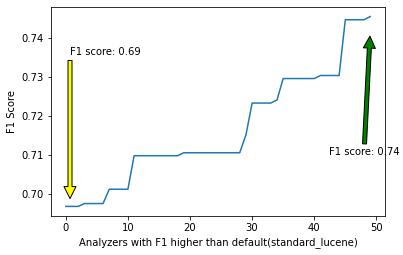

In [1]:
from statistics import Statistics

STATS = Statistics()
SCORES = STATS.generate_f1()
STATS.create_plot(SCORES)